# Predicting Housing Prices

## Introduction
Housing prices in certain parts of the US are on the rise. As a result, it is important for home buyers to be informed on the housing market by cross referencing prices with the various characteristics of a home. The question we will answer with our project is how the living room size and renovation year of a house affects the price. The dataset used to answer this question is called “House Sales in King County, USA” uploaded by user harlfoxem on Kaggle. The dataset includes 21  different variables, including house price, number of bathrooms, number of bedrooms, renovation year,  etcetera,  for a total of 21614 observations with each observation being a different home in King County, USA.

## Methods and Results

In [6]:
#please run this cell for correct packages
suppressMessages(library(tidyverse))
library(tidymodels)
suppressMessages(library(dbplyr))
install.packages("gridExtra")
library(gridExtra)
options(repr.plot.width=11, repr.plot.height=5)
options(scipen = 999, digits = 10)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [22]:
#Run to load and tidy the data
url <- "https://raw.githubusercontent.com/Moe-Jala/dsci-100-group-003-7/main/kc_house_data.csv"
housing_data <- read_csv(url, show_col_type = FALSE) |>
    select(price, sqft_living, yr_renovated) |>
    filter(yr_renovated != 0, price < 3000000)

In [23]:
#split and summarize key points of dataframe
set.seed(69)
housing_split <- initial_split(housing_data, prop = 0.75, strata = price)
housing_train <- training(housing_split)
housing_test <- testing(housing_split)

slice(housing_train, 1:5)

price,sqft_living,yr_renovated
<dbl>,<dbl>,<dbl>
247000,1270,2013
378750,2160,2011
310000,2190,1974
190000,630,2005
249900,1380,1957


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


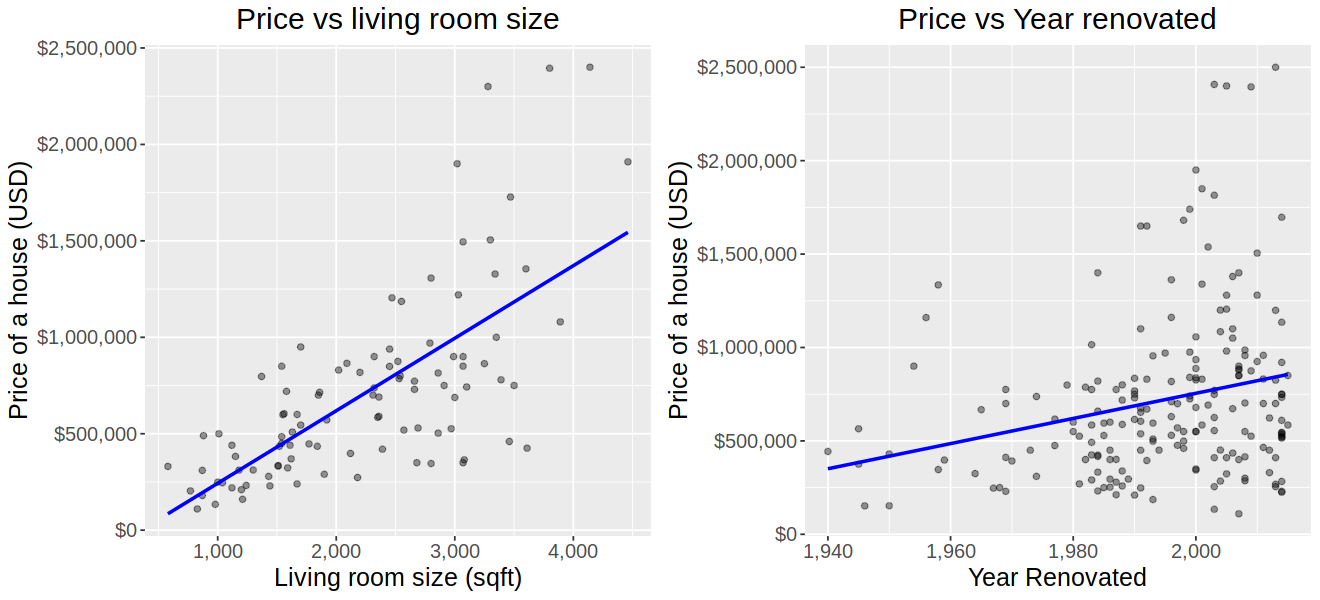

In [31]:
#Correlation between price and living room size/year renovated
set.seed(69)
price_versus_yr_plot <- housing_data |>
    sample_n(200)|>
    ggplot(aes(x = yr_renovated, y = price))+
        geom_point(alpha = 0.4)+
        labs(x = "Year Renovated", y = "Price of a house (USD)")+
        theme(text = element_text(size=15)) +
        scale_x_continuous(labels = scales::comma)+
        scale_y_continuous(labels = dollar_format()) +
        ggtitle("Price vs Year renovated")+
        geom_smooth(method = "lm", se = FALSE, color = "blue")+
        theme(plot.title = element_text(hjust = 0.5))

price_versus_size_plot <- housing_data |>
    sample_n(100)|>
    ggplot(aes(x = sqft_living, y = price))+
        geom_point(alpha = 0.4)+
        labs(x = "Living room size (sqft)", y = "Price of a house (USD)")+
        theme(text = element_text(size=15)) +
        scale_x_continuous(labels = scales::comma)+
        scale_y_continuous(labels = dollar_format()) +
        ggtitle("Price vs living room size")+
        geom_smooth(method = "lm", se = FALSE, color = "blue")+
        theme(plot.title = element_text(hjust = 0.5))

grid.arrange(price_versus_size_plot, price_versus_yr_plot, ncol = 2)

### K-nearest neighbor

In [28]:
# cross validation to choose optimal K (7.9) 
# retrain on optimal K and obtain RMSPE
# graph to visualize
# legend for all graphs

### Linear regression

In [ ]:
# literally just copy 8.6
# visualization
# legend for all graphs

## Discussion
summarize what you found

discuss whether this is what you expected to find?

discuss what impact could such findings have?

discuss what future questions could this lead to?


## References??